# Voir la situation dans son ensemble

- Les données incluent des métriques telles que la population, le revenu médian et le prix médian des logements pour chaque groupe de pâtés de maisons.

- Les groupes de pâtés de maisons sont la plus petite unité géographique pour laquelle le Bureau du recensement des États-Unis publie des données d'échantillonnage.

- Les groupes de pâtés de maisons ont généralement une population de 600 à 3 000 personnes.

- Les groupes de pâtés de maisons seront appelés "districts" pour simplifier.

- Le modèle doit apprendre à partir de ces données.

- Le modèle doit être capable de prédire le prix médian des logements dans n'importe quel district, en utilisant toutes les autres métriques disponibles.

# Définir le problème

- Le premier objectif est de définir l'objectif commercial.

- Comprendre comment l'entreprise prévoit d'utiliser et de tirer profit du modèle.

- L'objectif déterminera également le choix des algorithmes, des mesures de performance et le niveau d'effort à investir dans l'optimisation du modèle.

- Le modèle générera des prédictions du prix médian des logements d'un district.

- L'entreprise considère qu'il serait utile de former un modèle pour prédire le prix médian des logements d'un district en se basant sur d'autres données disponibles sur ce district.

- Les données du recensement offrent une opportunité intéressante pour ce projet, car elles contiennent les prix médians des logements de milliers de districts, ainsi que d'autres informations pertinentes.


Avec toutes ces informations, vous êtes maintenant prêt à commencer à concevoir votre système :

- Déterminez quel type de supervision d'entraînement le modèle nécessitera : s'agit-il d'une tâche supervisée, non supervisée, semi-supervisée ou d'apprentissage par renforcement ?

- Et est-ce une tâche de classification, une tâche de régression, ou autre chose ?

- Devriez-vous utiliser des techniques d'apprentissage par lots ou d'apprentissage en ligne ?

Pour répondre à ces questions :

- Il s'agit d'une tâche supervisée, car le modèle sera entraîné avec des exemples étiquetés (prix médian des logements du district).

- Il s'agit d'une tâche de régression, car le modèle devra prédire une valeur continue (prix médian des logements).

- Il convient d'utiliser des techniques d'apprentissage par lots, car il n'y a pas de flux continu de données entrant dans le système, et les données sont suffisamment petites pour tenir en mémoire.

# Choisir une mesure de performance

La racine carrée de l'erreur quadratique moyenne (RMSE) est en effet une mesure de performance couramment utilisée pour les problèmes de régression. Elle donne une indication globale de l'ampleur des erreurs que le modèle commet dans ses prédictions. La formule mathématique pour calculer la RMSE est la suivante :


$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $


Où :
- $ n $ est le nombre total d'observations dans l'ensemble de données de test.
- $ y_i $ est la valeur cible réelle pour l'observation $i$.
- $ \hat{y}_i $ est la valeur prédite par le modèle pour l'observation $i$.


La RMSE fournit une mesure interprétable de la performance du modèle, car elle est exprimée dans les mêmes unités que la variable cible (par exemple, les dollars pour les prix des logements).

Bien que la RMSE soit généralement la mesure de performance préférée pour les tâches de régression, dans certains contextes, vous pouvez préférer utiliser une autre fonction.

Par exemple, s'il existe de nombreux outliers. Dans ce cas, vous pouvez envisager d'utiliser l'erreur moyenne absolue (MAE, également appelée déviation absolue moyenne), illustrée par la formule suivante :

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $

Où :
- $ n $ est le nombre total d'observations dans l'ensemble de données de test.
- $ y_i $ est la valeur cible réelle pour l'observation $ i $.
- $ \hat{y}_i $ est la valeur prédite par le modèle pour l'observation $ i $.

L'erreur absolue moyenne (MAE) est une mesure alternative qui calcule la moyenne des écarts absolus entre les valeurs prédites et les valeurs réelles. Contrairement à la RMSE, la MAE n'accorde pas de poids supplémentaire aux erreurs importantes, ce qui en fait une mesure robuste en présence de valeurs aberrantes ou atypiques.

Tant la RMSE que la MAE sont des moyens de mesurer la distance entre deux vecteurs : le vecteur des prédictions et le vecteur des valeurs cibles.

# Obtenir des données

Dans des environnements typiques, vos données seraient disponibles dans une base de données relationnelle ou dans un autre type de magasin de données courant, et réparties sur plusieurs tables/documents/fichiers.

## Télécharger les données

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_housing_data():
    tarball_path = Path("/content/datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/tarekhaledai/machine_learning/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("/content/datasets/housing/housing.csv"))

housing = load_housing_data()

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/housing.tgz'

Vous commencez par examiner les cinq premières lignes de données à l'aide de la méthode head() du DataFrame.

Chaque ligne représente un district. Il y a 10 attributs : longitude (longitude), latitude (latitude), housing_median_age (ancienneté moyenne du logement), total_rooms (nombre total de pièces), total_bedrooms (nombre total de chambres), population (population), households (ménages), median_income (revenu médian), median_house_value (valeur médiane de la maison), et ocean_proximity (proximité de l'océan).

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


La méthode info() est utile pour obtenir une description rapide des données, en particulier le nombre total de lignes, le type de chaque attribut et le nombre de valeurs non nulles :

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Il y a 20 640 instances dans le jeu de données, ce qui signifie qu'il est assez petit selon les normes de l'apprentissage automatique, mais c'est parfait pour commencer.

Vous remarquez que l'attribut total_bedrooms a seulement 20 433 valeurs non nulles, ce qui signifie que 207 districts manquent de cette caractéristique. Vous devrez vous en occuper plus tard.

Tous les attributs sont numériques, sauf ocean_proximity. Son type est objet, donc il pourrait contenir n'importe quel type d'objet Python.

Lorsque vous avez examiné les cinq premières lignes, vous avez probablement remarqué que les valeurs dans la colonne ocean_proximity se répétaient, ce qui signifie qu'il s'agit probablement d'un attribut catégoriel.

Vous pouvez découvrir quelles catégories existent et combien de districts appartiennent à chaque catégorie en utilisant la méthode value_counts() :

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Les lignes count, mean, min et max sont explicites.

- Notez que les valeurs nulles sont ignorées (par exemple, le nombre total de chambres est de 20 433, pas 20 640).

- La ligne std indique l'écart-type, qui mesure la dispersion des valeurs.

- Les lignes 25%, 50% et 75% indiquent les percentiles correspondants : un percentile indique la valeur en dessous de laquelle un pourcentage donné d'observations dans un groupe d'observations se situe.

Une autre méthode rapide pour comprendre le type de données avec lesquelles vous travaillez est de tracer un histogramme pour chaque attribut numérique.

Un histogramme montre le nombre d'instances (sur l'axe vertical) qui ont une plage de valeurs donnée (sur l'axe horizontal).

Vous pouvez soit tracer un seul attribut à la fois, soit appeler la méthode hist() sur l'ensemble du jeu de données, et cela tracera un histogramme pour chaque attribut numérique.

In [ ]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

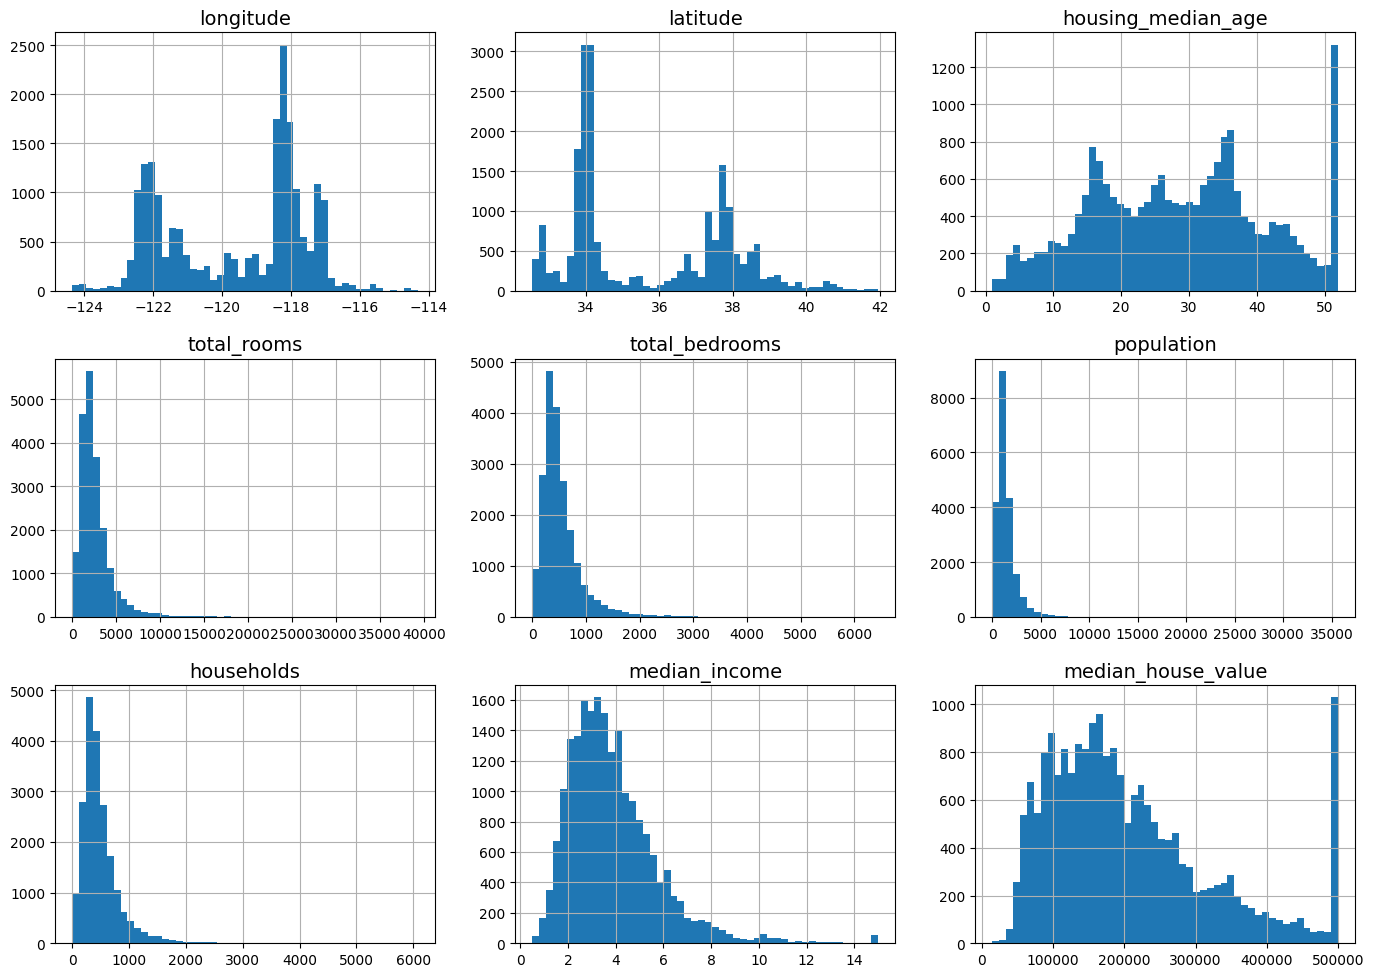

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(14,10))
save_fig("attribute_histogram_plots")  
plt.show()

En regardant ces histogrammes, vous remarquez quelques choses :

- Tout d'abord, l'attribut du revenu médian ne semble pas être exprimé en dollars américains (USD). Les chiffres représentent approximativement des dizaines de milliers de dollars (par exemple, 3 signifie environ 30 000 $). Travailler avec des attributs prétraités est courant en apprentissage automatique, et ce n'est pas nécessairement un problème, mais vous devriez essayer de comprendre comment les données ont été calculées.

- L'ancienneté médiane du logement et la valeur médiane de la maison ont également été plafonnées. Cette dernière peut être un problème sérieux car c'est votre attribut cible (vos étiquettes). Vos algorithmes d'apprentissage automatique peuvent apprendre que les prix ne dépassent jamais cette limite. Vous devez vérifier auprès de votre équipe cliente (l'équipe qui utilisera la sortie de votre système) pour voir si c'est un problème ou non. S'ils vous disent qu'ils ont besoin de prédictions précises même au-delà de 500 000 $, alors vous avez deux options :

    - Collecter des étiquettes appropriées pour les districts dont les étiquettes ont été plafonnées.
    - Supprimer ces districts de l'ensemble d'entraînement (et également de l'ensemble de test, car votre système ne devrait pas être évalué de manière médiocre s'il prédit des valeurs au-delà de 500 000 $).
    
- Ces attributs ont des échelles très différentes. Nous en discuterons plus tard dans ce chapitre, lorsque nous explorerons la mise à l'échelle des caractéristiques.
    
- Enfin, de nombreux histogrammes sont inclinés vers la droite : ils s'étendent beaucoup plus loin vers la droite de la médiane que vers la gauche. Cela peut rendre un peu plus difficile pour certains algorithmes d'apprentissage automatique de détecter des modèles. Plus tard, vous essayerez de transformer ces attributs pour avoir des distributions plus symétriques et en forme de cloche.

## Test set

La création d'un ensemble de test est théoriquement simple : choisissez quelques instances au hasard, généralement 20 % du jeu de données (ou moins si votre jeu de données est très grand), et mettez-les de côté :

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Pour assurer la reproductibilité du découpage, nous incluons un seed (42).

En fixant le seed, vous obtiendrez toujours la même séquence de nombres aléatoires, assurant ainsi une répartition cohérente entre l'ensemble d'entraînement et l'ensemble de test à chaque exécution.

<div class="alert alert-block alert-success">
Nous avons jusqu'à présent examiné les méthodes d'échantillonnage aléatoire, qui peuvent être adéquates pour de grands ensembles de données, mais risquent d'introduire un biais significatif si les données sont limitées.


Pour illustrer cela, prenons l'exemple d'une société d'études qui souhaite interroger 1 000 personnes dans une population. Plutôt que de sélectionner ces personnes au hasard, ils cherchent à garantir que l'échantillon soit représentatif de l'ensemble de la population. Cela s'appelle un échantillonnage stratifié, où la population est divisée en sous-groupes homogènes (strates) et un nombre approprié d'instances est échantillonné dans chaque strate pour assurer la représentativité de l'échantillon global. Si l'échantillonnage aléatoire pur était utilisé, il existerait un risque de biais important dans l'échantillon résultant. Ainsi, la stratégie d'échantillonnage doit être soigneusement considérée pour éviter les biais dans l'analyse des données.
<div>

Pour garantir que l'ensemble de test est représentatif des différentes catégories de revenus dans l'ensemble de données complet, vous devez créer un attribut de catégorie de revenu. Étant donné que le revenu médian est un attribut numérique continu, vous pouvez le regrouper en catégories. L'histogramme du revenu médian montre que la plupart des valeurs se situent entre 1,5 et 6 (soit 15 000 $ à 60 000 $), avec quelques valeurs allant au-delà de 6. Pour éviter un biais dans l'estimation de l'importance de chaque catégorie, vous devez vous assurer d'avoir un nombre suffisant d'instances dans chaque strate. Le code utilise la fonction pd.cut() pour créer cinq catégories de revenu, étiquetées de 1 à 5, en regroupant les valeurs de revenu médian en intervalles spécifiques.

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

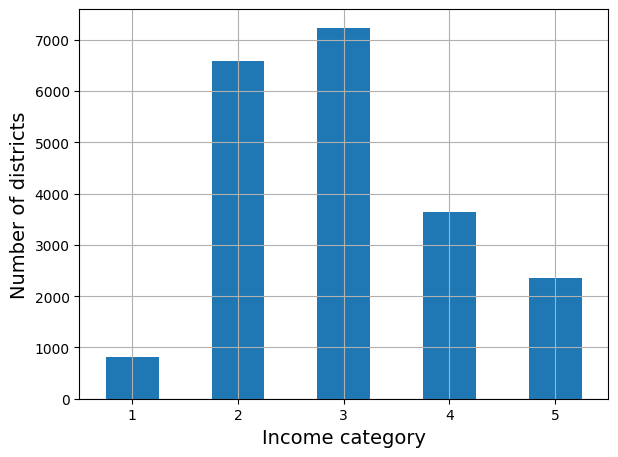

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot") 
plt.show()

Maintenant, vous êtes prêt à effectuer un échantillonnage stratifié basé sur la catégorie de revenu. Scikit-Learn fournit plusieurs classes de diviseurs dans le package sklearn.model_selection qui implémentent différentes stratégies pour diviser votre ensemble de données en un ensemble d'entraînement et un ensemble de test. Chaque diviseur possède une méthode split() qui renvoie un itérateur sur différentes répartitions d'entraînement/test des mêmes données.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

Pour être précis, la méthode split() fournit les indices des données d'entraînement et de test, pas les données elles-mêmes. Avoir plusieurs séparations peut être utile si vous souhaitez mieux estimer les performances de votre modèle, comme nous le verrons lorsque nous discuterons de la validation croisée plus tard dans ce chapitre. Par exemple, le code suivant génère 10 divisions stratifiées différentes du même ensemble de données :

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

Ou, comme l'échantillonnage stratifié est assez courant, il existe une manière plus concise d'obtenir une seule division en utilisant la fonction train_test_split() avec l'argument stratify

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

# Explorer et visualiser les données pour en tirer des enseignements

Jusqu'à présent, vous avez simplement jeté un coup d'œil rapide aux données pour avoir une idée générale du type de données que vous manipulez.

Maintenant, l'objectif est d'approfondir un peu plus. Tout d'abord, assurez-vous d'avoir mis de côté l'ensemble de test et que vous n'explorez que l'ensemble d'entraînement.

De plus, si l'ensemble d'entraînement est très grand, vous pouvez vouloir échantillonner un ensemble d'exploration, pour faciliter et accélérer les manipulations pendant la phase d'exploration. Dans ce cas, l'ensemble d'entraînement est assez petit, vous pouvez donc travailler directement sur l'ensemble complet. Comme vous allez expérimenter avec diverses transformations de l'ensemble d'entraînement complet, vous devriez faire une copie de l'original afin de pouvoir y revenir ensuite :

In [ ]:
housing = strat_train_set.copy()

## Visualisation de données géographiques

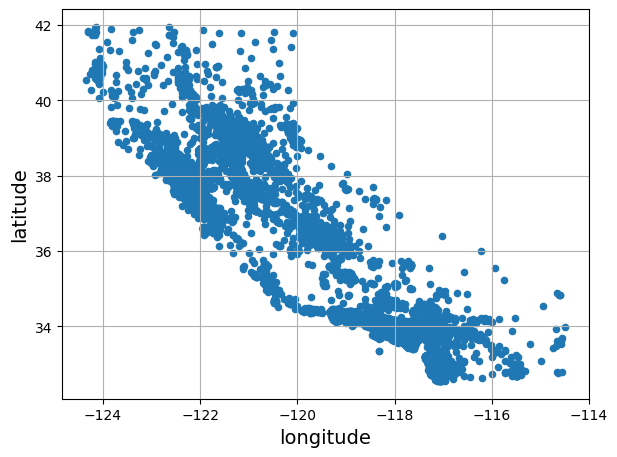

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")
plt.show()

Étant donné que l'ensemble de données comprend des informations géographiques (latitude et longitude), il est judicieux de créer un nuage de points de tous les districts pour visualiser les données. Il est difficile de voir un schéma particulier. En définissant l'option alpha sur 0,2, il est beaucoup plus facile de visualiser les endroits où il y a une forte densité de points de données.

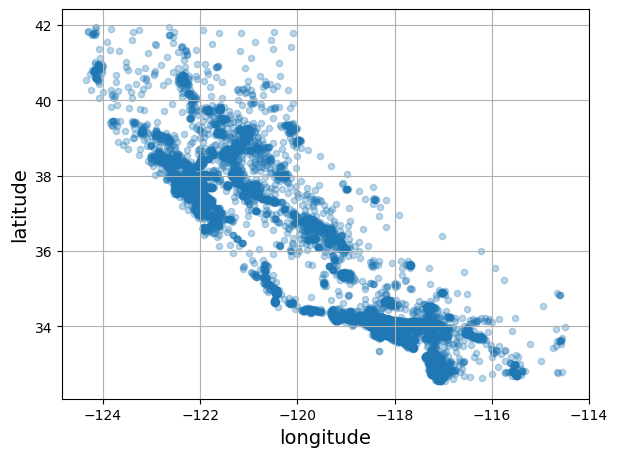

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.3)
save_fig("better_visualization_plot")  
plt.show()

Maintenant, c'est bien mieux : vous pouvez clairement voir les zones de haute densité. Nos cerveaux sont très doués pour repérer les motifs dans les images, mais il peut être nécessaire de jouer avec les paramètres de visualisation pour faire ressortir les motifs.

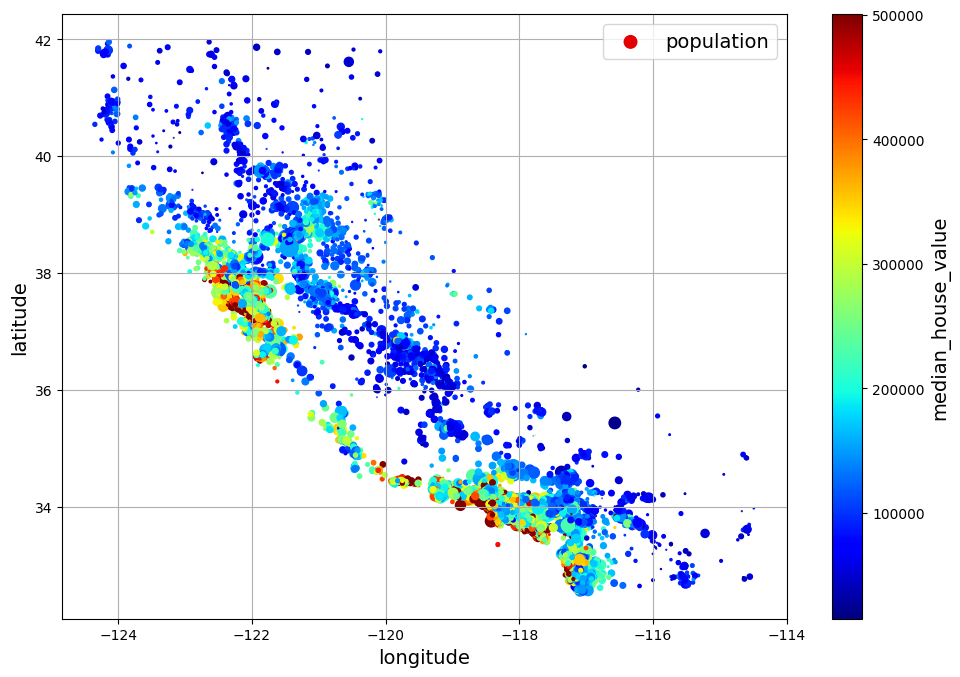

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  
plt.show()

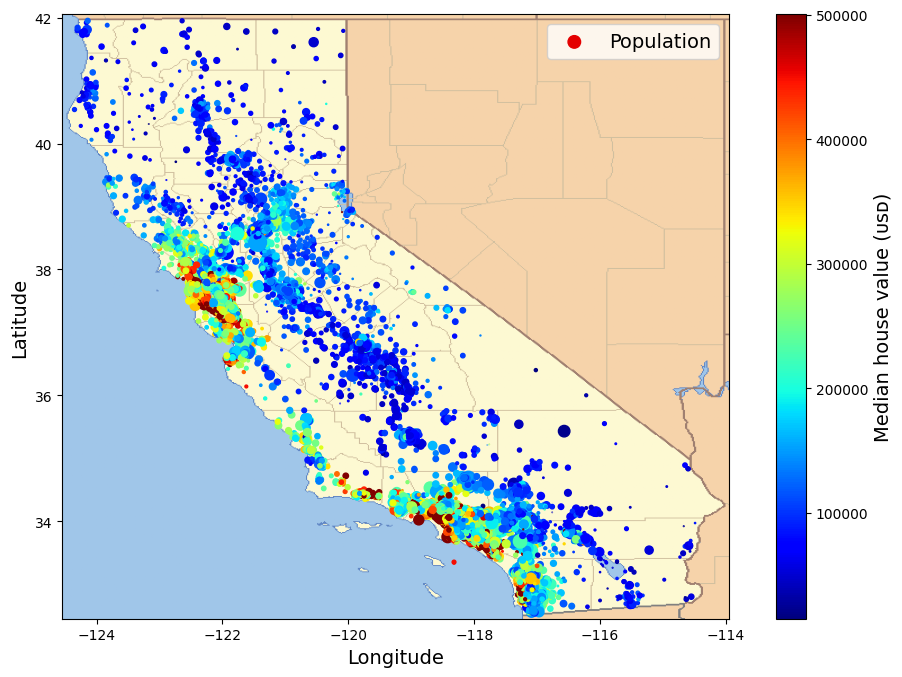

In [ ]:
# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/tarekhaledai/machine_learning/raw/main/"
    url = homl3_root + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()


L'argument `sharex=False` corrige un bug d'affichage : sans lui, les valeurs de l'axe des x et le label ne sont pas affichés (voir : https://github.com/pandas-dev/pandas/issues/10611).

L'image des prix des logements montre une forte corrélation avec l'emplacement, en particulier la proximité de l'océan, ainsi qu'avec la densité de population. Un algorithme de regroupement pourrait être utile pour identifier les principaux clusters et pour ajouter de nouvelles fonctionnalités basées sur la proximité des centres de ces clusters. Bien que la proximité de l'océan puisse également être un facteur important

## Recherche de corrélations

In [ ]:
corr_matrix = housing.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Le coefficient de corrélation varie de -1 à 1. Lorsqu'il est proche de 1, cela signifie qu'il y a une forte corrélation positive ; par exemple, la valeur médiane des maisons tend à augmenter lorsque le revenu médian augmente.

Lorsque le coefficient est proche de -1, cela signifie qu'il y a une forte corrélation négative ; vous pouvez observer une légère corrélation négative entre la latitude et la valeur médiane des maisons (c'est-à-dire que les prix ont tendance à baisser légèrement lorsque vous allez vers le nord).

Enfin, des coefficients proches de 0 signifient qu'il n'y a pas de corrélation linéaire.

Une autre façon de vérifier la corrélation entre les attributs est d'utiliser la fonction scatter_matrix() de Pandas, qui trace chaque attribut numérique par rapport à chaque autre attribut numérique. Comme il y a maintenant 11 attributs numériques, vous obtiendriez 11^2 = 121 graphiques, ce qui ne tiendrait pas sur une page. Vous décidez donc de vous concentrer sur quelques attributs prometteurs qui semblent les plus corrélés avec la valeur médiane des logements.

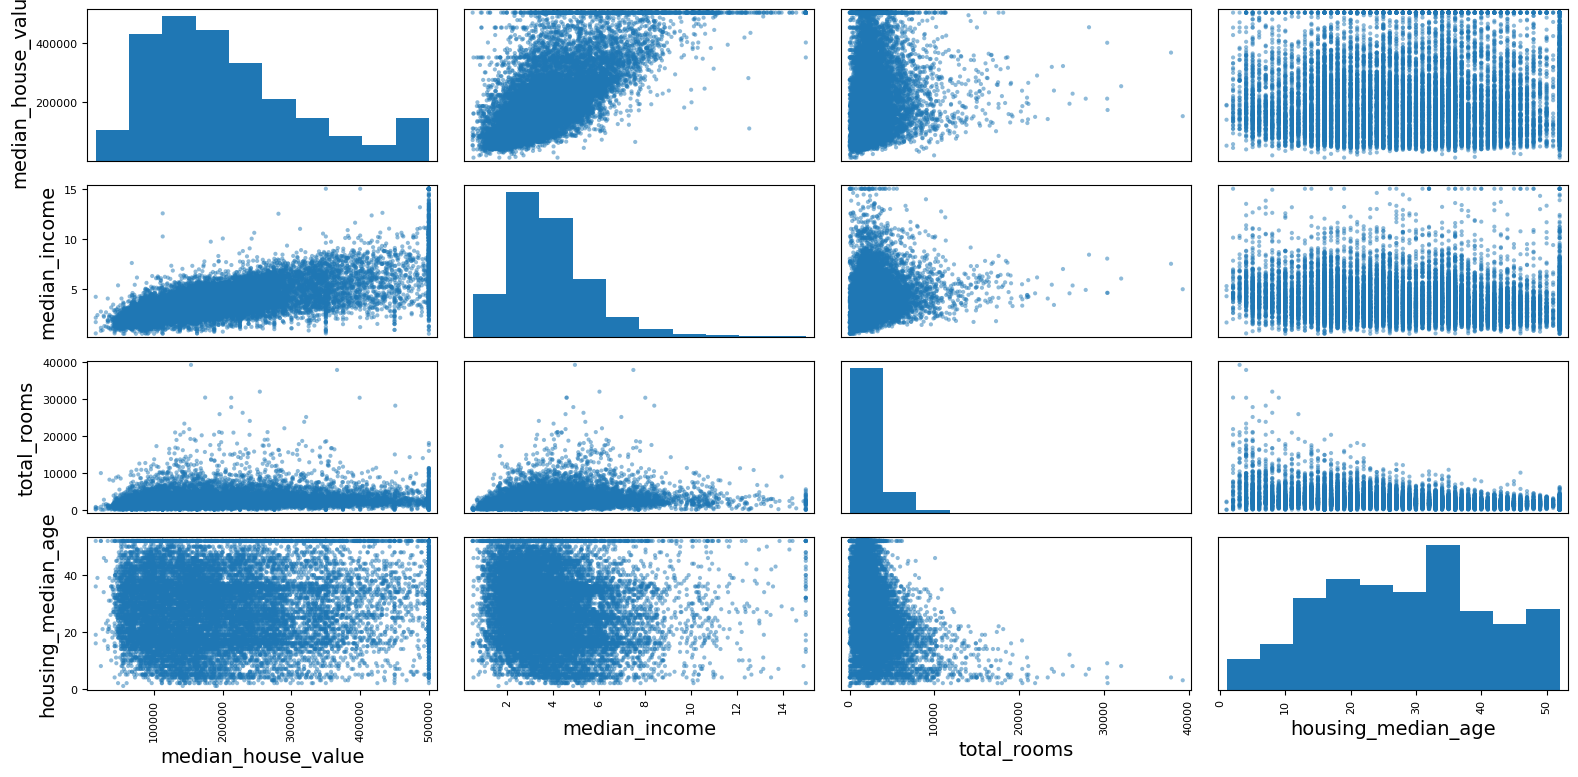

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(16, 8))
save_fig("scatter_matrix_plot")  
plt.show()

En examinant les nuages de points de corrélation, il semble que l'attribut le plus prometteur pour prédire la valeur médiane des logements soit le revenu médian. Vous vous concentrez donc sur leur nuage de points.

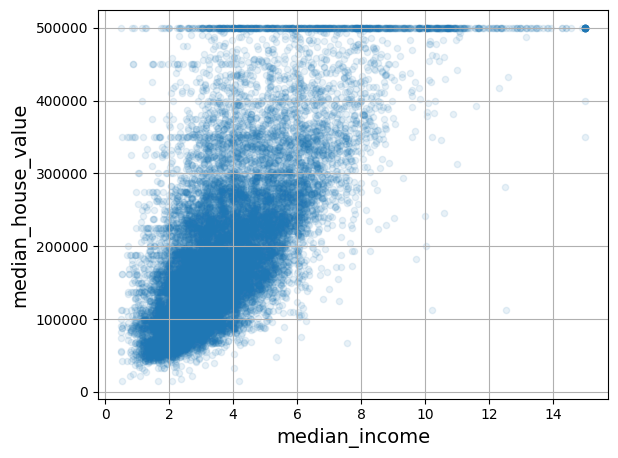

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot") 
plt.show()

Ce graphique révèle quelques choses :
- Tout d'abord, la corrélation est effectivement assez forte ; vous pouvez clairement voir la tendance à la hausse, et les points ne sont pas trop dispersés.

- Deuxièmement, la limite de prix que vous avez remarquée précédemment est clairement visible sous la forme d'une ligne horizontale à 500 000 $.

- Mais le graphique révèle également d'autres lignes droites moins évidentes :
    - une ligne horizontale autour de 450 000 $, une autre autour de 350 000 $,
    - peut-être une autour de 280 000 $, et quelques autres en dessous de cela.
        
    Vous voudrez peut-être essayer de supprimer les districts correspondants pour empêcher vos algorithmes d'apprendre à reproduire ces particularités des données.

<div class="alert alert-block alert-success">

Le coefficient de corrélation ne mesure que les corrélations linéaires ("quand x augmente, y augmente/diminue généralement"). Il peut totalement ignorer les relations non linéaires (par exemple, "quand x se rapproche de 0, y augmente généralement").

<div>


<div class="alert alert-block alert-success">

Remarquez comment tous les graphiques de la rangée du bas ont un coefficient de corrélation égal à 0, malgré le fait que leurs axes ne sont clairement pas indépendants : ce sont des exemples de relations non linéaires. De plus, la deuxième rangée montre des exemples où le coefficient de corrélation est égal à 1 ou -1 ;

<div>

## Expérimenter des combinaisons d'attributs


Avant de préparer les données pour les algorithmes d'apprentissage automatique, une dernière chose que vous voudrez peut-être faire est d'essayer différentes combinaisons d'attributs.

Par exemple, le nombre total de pièces dans un district n'est pas très utile si vous ne connaissez pas le nombre de ménages. Ce que vous voulez vraiment, c'est le nombre de pièces par ménage.

De même, le nombre total de chambres en soi n'est pas très utile : vous voulez probablement le comparer au nombre de pièces.

De plus, la population par ménage semble également être une combinaison d'attributs intéressante à examiner. Vous créez ces nouveaux attributs comme suit :

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

Le nouvel attribut bedrooms_ratio est beaucoup plus corrélé avec la valeur médiane des logements que le nombre total de pièces ou de chambres. Apparemment, les maisons avec un ratio chambre/pièce plus bas ont tendance à être plus chères. Le nombre de pièces par ménage est également plus informatif que le nombre total de pièces dans un district : évidemment, plus les maisons sont grandes, plus elles sont chères.

Cette étape d'exploration ne doit pas nécessairement être exhaustive ; le but est de partir du bon pied et d'obtenir rapidement des informations qui vous aideront à obtenir un premier prototype raisonnablement bon. Mais c'est un processus itératif : une fois que vous avez un prototype opérationnel, vous pouvez analyser ses résultats pour obtenir plus d'informations et revenir à cette étape d'exploration.

# Préparer les données pour les algorithmes d'apprentissage automatique

Il est temps de préparer les données pour vos algorithmes d'apprentissage automatique. Au lieu de le faire manuellement, vous devriez écrire des fonctions à cette fin, pour plusieurs bonnes raisons :

- Cela vous permettra de reproduire facilement ces transformations sur n'importe quel ensemble de données (par exemple, la prochaine fois que vous obtiendrez un ensemble de données frais).
- Vous construirez progressivement une bibliothèque de fonctions de transformation que vous pourrez réutiliser dans des projets futurs.
- Vous pouvez utiliser ces fonctions dans votre système en direct pour transformer les nouvelles données avant de les soumettre à vos algorithmes.
- Cela vous permettra d'essayer facilement diverses transformations et de voir quelle combinaison de transformations fonctionne le mieux.


Mais d'abord, revenez à un ensemble d'entraînement propre (en copiant à nouveau strat_train_set). Vous devriez également séparer les prédicteurs et les étiquettes, car vous ne voulez pas nécessairement appliquer les mêmes transformations aux prédicteurs et aux valeurs cibles (notez que drop() crée une copie des données et n'affecte pas strat_train_set) :

## Nettoyage des données

La plupart des algorithmes d'apprentissage automatique ne peuvent pas fonctionner avec des caractéristiques manquantes, donc vous devrez prendre soin de celles-ci. Par exemple, vous avez remarqué plus tôt que l'attribut total_bedrooms a quelques valeurs manquantes. Vous avez trois options pour résoudre ce problème :

1. Vous débarrasser des districts correspondants.
2. Vous débarrasser de l'ensemble de l'attribut.
3. Définir les valeurs manquantes sur une valeur (zéro, la moyenne, la médiane, etc.). Cela s'appelle l'imputation.

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,5


Pour utiliser SimpleImputer, vous devez d'abord créer une instance de SimpleImputer, en spécifiant que vous voulez remplacer les valeurs manquantes de chaque attribut par la médiane de cet attribut :

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Séparer les attributs numériques pour utiliser la stratégie "médiane" (car elle ne peut pas être calculée sur les attributs textuels comme `ocean_proximity`)

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

Maintenant, vous pouvez utiliser cet imputeur "entraîné" pour transformer l'ensemble d'entraînement en remplaçant les valeurs manquantes par les médianes apprises :

Les valeurs manquantes peuvent également être remplacées par la valeur moyenne (strategy="mean"), ou par la valeur la plus fréquente (strategy="most_frequent"), ou par une valeur constante (strategy="constant", fill_value=...). Les deux dernières stratégies prennent en charge les données non numériques.

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Transform the training set:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [ ]:
imputer.strategy

'median'

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


<div class="alert alert-block alert-success">

Il existe également des imputeurs plus puissants disponibles dans le package sklearn.impute (pour les caractéristiques numériques uniquement) :

- KNNImputer remplace chaque valeur manquante par la moyenne des valeurs des k voisins les plus proches pour cette caractéristique. La distance est basée sur toutes les caractéristiques disponibles.

- IterativeImputer entraîne un modèle de régression par caractéristique pour prédire les valeurs manquantes en fonction de toutes les autres caractéristiques disponibles. Ensuite, il entraîne à nouveau le modèle sur les données mises à jour, et répète le processus plusieurs fois, améliorant les modèles et les valeurs de remplacement à chaque itération.


<div>

## Traitement des attributs textuels et catégoriels

Jusqu'à présent, nous n'avons traité que des attributs numériques, mais vos données peuvent également contenir des attributs textuels. Dans cet ensemble de données, il n'y en a qu'un : l'attribut ocean_proximity. Regardons ses valeurs pour les premières instances :

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Ce ne sont pas des textes arbitraires : il y a un nombre limité de valeurs possibles, chacune représentant une catégorie. Ainsi, cet attribut est un attribut catégoriel. La plupart des algorithmes d'apprentissage automatique préfèrent travailler avec des nombres, donc convertissons ces catégories du texte en nombres. Pour cela, nous pouvons utiliser la classe OrdinalEncoder de Scikit-Learn :

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Un problème avec cette représentation est que les algorithmes d'apprentissage automatique supposeront que deux valeurs proches sont plus similaires que deux valeurs éloignées. Cela peut être acceptable dans certains cas (par exemple, pour des catégories ordonnées telles que "mauvais", "moyen", "bon" et "excellent"), mais ce n'est évidemment pas le cas pour la colonne ocean_proximity (par exemple, les catégories 0 et 4 sont clairement plus similaires que les catégories 0 et 1).

Pour résoudre ce problème, une solution courante est de créer un attribut binaire par catégorie : un attribut égal à 1 lorsque la catégorie est "<1H OCEAN" (et 0 sinon), un autre attribut égal à 1 lorsque la catégorie est "INLAND" (et 0 sinon), et ainsi de suite. Cela s'appelle un encodage one-hot, car un seul attribut sera égal à 1 (chaud), tandis que les autres seront à 0 (froid). Les nouveaux attributs sont parfois appelés attributs fictifs. Scikit-Learn fournit une classe OneHotEncoder pour convertir les valeurs catégorielles en vecteurs one-hot :

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternativement, vous pouvez définir `sparse_output=False` lors de la création du `OneHotEncoder` (note : l'hyperparamètre `sparse` a été renommé en `sparse_output` dans Scikit-Learn 1.2) :

In [ ]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]


Si un attribut catégoriel comporte un grand nombre de catégories possibles (par exemple, code pays, profession, espèce), alors l'encodage one-hot entraînera un grand nombre de caractéristiques d'entrée. Cela peut ralentir l'entraînement et dégrader les performances. Si cela se produit, vous voudrez peut-être remplacer l'entrée catégorielle par des caractéristiques numériques utiles liées aux catégories :
- par exemple, vous pourriez remplacer la caractéristique ocean_proximity par la distance à l'océan (de même, un code pays pourrait être remplacé par la population du pays et le PIB par habitant).
- Alternativement, vous pouvez remplacer chaque catégorie par un vecteur de dimension réduite apprenable appelé embedding.

## Mise à l'échelle et transformation des caractéristiques

L'une des transformations les plus importantes à appliquer à vos données est la mise à l'échelle des caractéristiques. À quelques exceptions près, les algorithmes d'apprentissage automatique ne fonctionnent pas bien lorsque les attributs numériques d'entrée ont des échelles très différentes. C'est le cas pour les données sur le logement : le nombre total de pièces varie d'environ 6 à 39 320, tandis que les revenus médians ne vont que de 0 à 15. Sans mise à l'échelle, la plupart des modèles auront tendance à ignorer le revenu médian et à se concentrer davantage sur le nombre de pièces.

Il existe deux façons courantes d'obtenir que toutes les caractéristiques aient la même échelle : la mise à l'échelle min-max et la standardisation.

La mise à l'échelle min-max (que beaucoup de gens appellent normalisation) est la plus simple : pour chaque attribut, les valeurs sont décalées et mises à l'échelle de manière à ce qu'elles se situent entre 0 et 1. Cela est réalisé en soustrayant la valeur minimale et en divisant par la différence entre le min et le max. Scikit-Learn fournit un transformateur appelé MinMaxScaler pour cela. Il dispose d'un hyperparamètre feature_range qui vous permet de modifier la plage si, pour une raison quelconque, vous ne voulez pas de 0 à 1 (par exemple, les réseaux neuronaux fonctionnent mieux avec des entrées de moyenne nulle, donc une plage de -1 à 1 est préférable). C'est assez facile à utiliser :

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

La standardisation est différente : elle soustrait d'abord la valeur moyenne (de sorte que les valeurs standardisées ont une moyenne nulle), puis elle divise le résultat par l'écart type (de sorte que les valeurs standardisées ont un écart type égal à 1). Contrairement à la mise à l'échelle min-max, la standardisation ne restreint pas les valeurs à une plage spécifique. Cependant, la standardisation est beaucoup moins affectée par les valeurs aberrantes. Par exemple, supposons qu'un district ait un revenu médian égal à 100 (par erreur), au lieu des 0 à 15 habituels. La mise à l'échelle min-max dans la plage de 0 à 1 ferait passer cette valeur aberrante à 1 et écraserait toutes les autres valeurs à 0 à 0,15, tandis que la standardisation ne serait pas beaucoup affectée. Scikit-Learn fournit un transformateur appelé StandardScaler pour la standardisation :

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

Lorsque les distributions des caractéristiques ont des queues lourdes, la mise à l'échelle standard et min-max risquent de compresser la plupart des valeurs dans une petite plage, ce qui n'est pas favorable aux modèles d'apprentissage automatique. Pour remédier à cela, il est recommandé de transformer la fonctionnalité pour réduire la queue lourde et rendre la distribution plus symétrique. Une approche courante consiste à remplacer les caractéristiques positives avec des queues lourdes par leur racine carrée ou leur logarithme. Par exemple, la fonctionnalité de population suit une loi de puissance, mais son logarithme produit une distribution plus proche d'une distribution gaussienne, ce qui est plus adapté aux modèles d'apprentissage automatique.

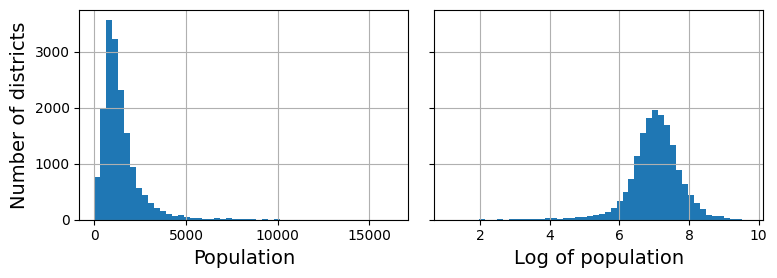

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

Une autre approche pour gérer les caractéristiques à queues lourdes consiste à diviser la distribution en seaux de taille approximativement égale, puis à remplacer chaque valeur de la caractéristique par l'indice du seau auquel elle appartient. Cela crée une distribution presque uniforme, ce qui élimine le besoin de mise à l'échelle supplémentaire. Pour les caractéristiques avec une distribution multimodale, comme l'âge médian des logements, il peut être utile de les diviser en seaux et de traiter les identifiants de seau comme des catégories plutôt que des valeurs numériques. Cela permet au modèle de régression d'apprendre plus facilement des règles différentes pour différentes plages de valeurs de cette caractéristique. Une autre approche consiste à ajouter une caractéristique pour chacun des modes, représentant la similarité entre l'âge médian des logements et ce mode particulier, mesurée à l'aide d'une fonction de base radiale (RBF).

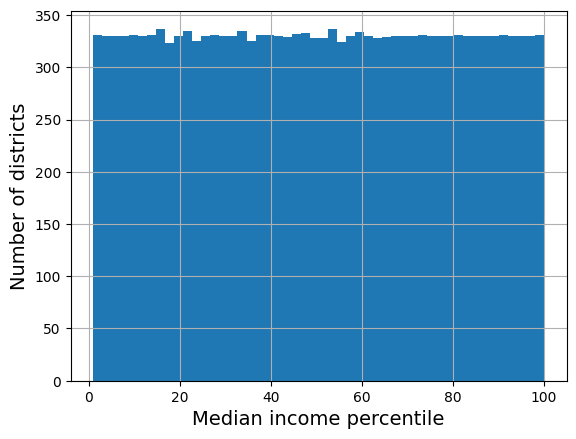

In [ ]:

percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

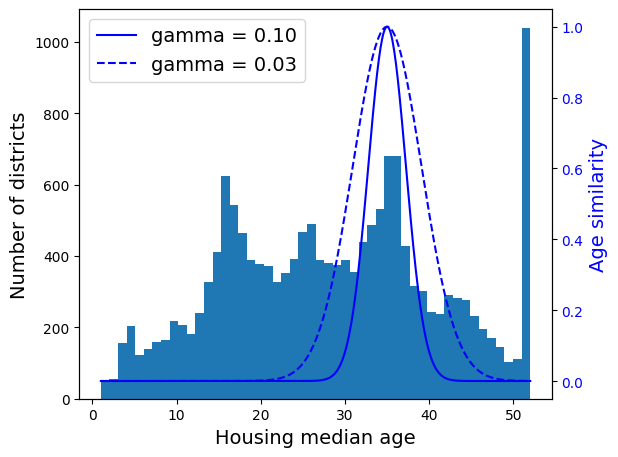

In [ ]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

Jusqu'à présent, nous avons uniquement examiné les caractéristiques d'entrée, mais les valeurs cibles peuvent également nécessiter une transformation. Par exemple, si la distribution cible a une queue lourde, vous pouvez choisir de remplacer la cible par son logarithme. Cependant, dans ce cas, le modèle de régression prédira le logarithme de la valeur médiane de la maison, et non la valeur médiane de la maison elle-même. Vous devrez calculer l'exponentielle de la prédiction du modèle si vous souhaitez obtenir la valeur médiane de la maison prédite.

Heureusement, la plupart des transformateurs de Scikit-Learn disposent d'une méthode inverse_transform(), ce qui facilite le calcul de l'inverse de leurs transformations. Par exemple, le code suivant montre comment mettre à l'échelle les étiquettes à l'aide d'un StandardScaler (tout comme nous l'avons fait pour les entrées), puis entraîner un modèle de régression linéaire simple sur les étiquettes mises à l'échelle résultantes et l'utiliser pour faire des prédictions sur de nouvelles données, que nous transformons ensuite à l'échelle d'origine à l'aide de la méthode inverse_transform() du scaler entraîné.

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

Cela fonctionne bien, mais une option plus simple consiste à utiliser un TransformedTargetRegressor. Nous devons simplement le construire, en lui fournissant le modèle de régression et le transformateur d'étiquettes, puis l'adapter à l'ensemble d'entraînement en utilisant les étiquettes non mises à l'échelle d'origine. Il utilisera automatiquement le transformateur pour mettre à l'échelle les étiquettes et entraînera le modèle de régression sur les étiquettes mises à l'échelle résultantes, tout comme nous l'avons fait précédemment. Ensuite, lorsque nous voulons faire une prédiction, il appellera la méthode predict() du modèle de régression et utilisera la méthode inverse_transform() du scaler pour produire la prédiction:

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom Transformers

Pour les transformations qui ne nécessitent pas d'entraînement, vous pouvez simplement écrire une fonction qui prend un tableau NumPy en entrée et renvoie le tableau transformé.

Par exemple, il est souvent judicieux de transformer les caractéristiques ayant des distributions à queue lourde en remplaçant celles-ci par leur logarithme (en supposant que la caractéristique est positive et que la queue est à droite). Créons un transformateur logarithmique et appliquons-le à la caractéristique de population.


In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

Votre fonction de transformation peut prendre des hyperparamètres comme arguments supplémentaires. Par exemple, voici comment créer un transformateur qui calcule la même mesure de similarité RBF gaussienne que précédemment :

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

Un transformateur personnalisé peut utiliser d'autres estimateurs dans son implémentation.

Par exemple, le code suivant montre un transformateur personnalisé qui utilise KMeans dans la méthode fit() pour identifier les clusters principaux dans les données d'entraînement, puis utilise rbf_kernel() dans la méthode transform() pour mesurer la similarité de chaque échantillon avec chaque centre de cluster :

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):

    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):

        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)

        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):

        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [ ]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

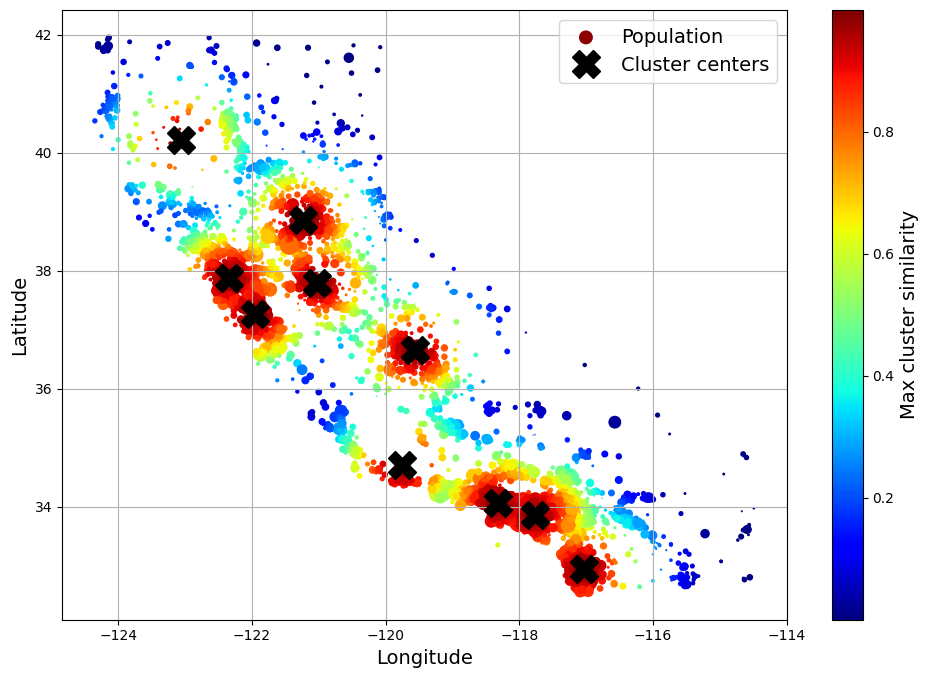

In [ ]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## Transformation Pipelines

- Une séquence de composants de traitement de données est appelée un pipeline de données.

- Les pipelines sont très courants dans les systèmes d'apprentissage automatique en raison du volume de données à manipuler et des nombreuses transformations à appliquer.

- Les composants fonctionnent généralement de manière asynchrone, tirant une grande quantité de données, les traitant et renvoyant le résultat dans une autre base de données.

- Ensuite, un composant suivant dans le pipeline utilise ces données pour produire sa propre sortie.

- Chaque composant est autonome, les composants sont reliés uniquement par une base de données.

- Cela permet à différentes équipes de se concentrer sur différents composants.

- De plus, si un composant tombe en panne, les composants en aval peuvent souvent continuer à fonctionner normalement en utilisant simplement la dernière sortie disponible du composant défectueux.

- Cependant, un composant défectueux peut rester inaperçu pendant un certain temps si une surveillance appropriée n'est pas mise en place, entraînant une obsolescence des données et une baisse des performances du système.

Comme vous pouvez le constater, il existe de nombreuses étapes de transformation des données qui doivent être exécutées dans le bon ordre. Heureusement, Scikit-Learn fournit la classe Pipeline pour aider avec de telles séquences de transformations. Voici un petit pipeline pour les attributs numériques, qui va d'abord imputer puis mettre à l'échelle les caractéristiques d'entrée :


In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

Si vous ne voulez pas nommer les transformateurs, vous pouvez utiliser la fonction make_pipeline() à la place ; elle prend les transformateurs en tant qu'arguments positionnels et crée un Pipeline en utilisant les noms des classes des transformateurs, en minuscules et sans tirets bas (par exemple, "simpleimputer").

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [ ]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
df_housing_num_prepared.head(2)  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [ ]:
num_pipeline[1]

StandardScaler()

In [ ]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [ ]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [ ]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

Jusqu'à présent, nous avons traité séparément les colonnes catégorielles et numériques. Il serait plus pratique d'avoir un seul transformateur capable de gérer toutes les colonnes, en appliquant les transformations appropriées à chaque colonne. Pour cela, vous pouvez utiliser un ColumnTransformer. Par exemple, le ColumnTransformer suivant appliquera num_pipeline (celui que nous venons de définir) aux attributs numériques et cat_pipeline à l'attribut catégoriel.

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:

housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)

housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 25)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

# Choisir et entrainer un modèle

## Entraînement et évaluation sur l'ensemble d'entraînement

Enfin ! Vous avez défini le problème, obtenu les données et les avez explorées, échantillonné un ensemble d'entraînement et un ensemble de test, et écrit un pipeline de prétraitement pour nettoyer et préparer automatiquement vos données pour les algorithmes d'apprentissage automatique. Vous êtes maintenant prêt à sélectionner et entraîner un modèle d'apprentissage automatique.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a2...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2004d71060>)])),
                ('linearregression', LinearRegression())])

Vous disposez maintenant d'un modèle de régression linéaire fonctionnel. Vous l'essayez sur l'ensemble d'entraînement, en examinant les cinq premières prédictions et en les comparant aux étiquettes :

Let's try the full preprocessing pipeline on a few training instances:

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([248000., 394100., 120700.,  90800., 330400.])

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-45.9%, -18.5%, 18.7%, -5.5%, -8.7%


D'accord, cela fonctionne, mais pas toujours : la première prédiction est très éloignée (de plus de 200 000 $ !), tandis que les autres prédictions sont meilleures : deux sont éloignées d'environ 25 % et deux sont éloignées de moins de 10 %. Rappelez-vous que vous avez choisi d'utiliser le RMSE comme mesure de performance, donc vous voulez mesurer le RMSE de ce modèle de régression sur l'ensemble d'entraînement en utilisant la fonction mean_squared_error() de Scikit-Learn, avec l'argument squared défini sur False :


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68047.65529482678

Ce n'est pas un score génial : les valeurs médianes des logements de la plupart des quartiers se situent entre 120 000 $ et 265 000 $, donc une erreur de prédiction typique de 68 628 $ n'est vraiment pas satisfaisante. C'est un exemple d'un modèle sous-ajustant les données d'entraînement. Lorsque cela se produit, cela peut signifier que les caractéristiques ne fournissent pas suffisamment d'informations pour faire de bonnes prédictions, ou que le modèle n'est pas assez puissant.

Les principales façons de résoudre le sous-ajustement sont de sélectionner un modèle plus puissant, de fournir à l'algorithme d'entraînement de meilleures caractéristiques ou de réduire les contraintes sur le modèle. Ce modèle n'est pas régularisé, ce qui exclut la dernière option. Vous pourriez essayer d'ajouter plus de fonctionnalités, mais d'abord, vous voulez essayer un modèle plus complexe pour voir comment il se comporte.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a2...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2004d71060>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

Aucune erreur du tout ? Ce modèle pourrait-il vraiment être absolument parfait ? Bien sûr, il est beaucoup plus probable que le modèle ait fortement surajusté les données. Comment en être sûr ? Vous ne voulez pas toucher l'ensemble de test tant que vous n'êtes pas prêt à lancer un modèle en lequel vous avez confiance,  vous devez donc utiliser une partie de l'ensemble d'entraînement pour l'entraînement et une partie pour la validation du modèle.


## Meilleure évaluation grâce à la validation croisée

Une façon d'évaluer le modèle d'arbre de décision serait d'utiliser la fonction `train_test_split()` pour diviser l'ensemble d'entraînement en un plus petit ensemble d'entraînement et un ensemble de validation, puis d'entraîner vos modèles sur le plus petit ensemble d'entraînement et de les évaluer sur l'ensemble de validation.

Une excellente alternative est d'utiliser la fonctionnalité de validation croisée à k plis de Scikit-Learn. Le code suivant divise aléatoirement l'ensemble d'entraînement en 10 sous-ensembles non chevauchants appelés plis, puis il entraîne et évalue le modèle d'arbre de décision 10 fois, en choisissant un pli différent pour l'évaluation à chaque fois et en utilisant les 9 autres plis pour l'entraînement. Le résultat est un tableau contenant les 10 scores d'évaluation :

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
tree_rmses

array([65874.99343704, 66026.64899055, 65708.55457299, 65073.68396516,
       64467.33644065, 68221.92234517, 70051.3550507 , 68955.6415472 ,
       68482.42643913, 65050.08258178])

In [ ]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66791.264537
std       1949.313791
min      64467.336441
25%      65232.401617
50%      65950.821214
75%      68417.300416
max      70051.355051
dtype: float64

Maintenant, l'arbre de décision ne semble pas aussi performant qu'auparavant. En fait, il semble presque aussi mal performer que le modèle de régression linéaire! Remarquez que la validation croisée vous permet d'obtenir non seulement une estimation des performances de votre modèle, mais aussi une mesure de la précision de cette estimation (c'est-à-dire son écart type). L'arbre de décision a un RMSE d'environ 66 868, avec un écart type d'environ 2 061. Vous n'auriez pas cette information si vous utilisiez simplement un ensemble de validation. Mais la validation croisée a pour coût d'entraîner le modèle plusieurs fois, ce qui n'est pas toujours réalisable.

In [ ]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     69104.202979
std       3782.877757
min      64812.478738
25%      67456.796891
50%      68303.471406
75%      69289.258468
max      78930.111876
dtype: float64

Essayons maintenant un dernier modèle : le RandomForestRegressor.

Les RandomForestRegressor fonctionnent en entraînant de nombreux arbres de décision sur des sous-ensembles aléatoires des caractéristiques, puis en moyennant leurs prédictions.

De tels modèles composés de nombreux autres modèles sont appelés ensembles : ils sont capables d'améliorer les performances du modèle sous-jacent (dans ce cas, les arbres de décision). Le code est presque identique à celui précédemment utilisé :


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47042.341721
std       1056.004286
min      45574.447034
25%      46507.787732
50%      46891.828872
75%      47346.956322
max      49424.336447
dtype: float64

In [ ]:
forest_reg.fit(housing, housing_labels)

housing_predictions = forest_reg.predict(housing)

forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17525.13783819652

C'est bien mieux : les forêts aléatoires semblent vraiment prometteuses pour cette tâche !

Cependant, si vous entraînez un RandomForest et mesurez le RMSE sur l'ensemble d'entraînement, vous trouverez environ 17,474 : c'est beaucoup plus bas, ce qui signifie qu'il y a encore beaucoup de overfitting.

Les solutions possibles sont de simplifier le modèle, de le contraindre (c'est-à-dire de le régulariser), ou d'obtenir beaucoup plus de données d'entraînement. Avant de plonger plus profondément dans les forêts aléatoires, cependant, vous devriez essayer de nombreux autres modèles issus de différentes catégories d'algorithmes d'apprentissage automatique, sans passer trop de temps à ajuster les hyperparamètres.

L'objectif est de présélectionner quelques modèles prometteurs (deux à cinq).

# Fine-Tune

Une option serait de manipuler manuellement les hyperparamètres jusqu'à ce que vous trouviez une excellente combinaison de valeurs d'hyperparamètres. Ce travail serait très fastidieux, et vous pourriez ne pas avoir le temps d'explorer de nombreuses combinaisons. Au lieu de cela, vous pouvez utiliser la classe GridSearchCV de Scikit-Learn pour le faire à votre place. Tout ce que vous avez à faire est de lui dire quels hyperparamètres vous souhaitez expérimenter et quelles valeurs essayer, et il utilisera la validation croisée pour évaluer toutes les combinaisons possibles de valeurs d'hyperparamètres. Par exemple, le code suivant recherche la meilleure combinaison de valeurs d'hyperparamètres pour le RandomForestRegressor :

## Grid Search

Remarquez que vous pouvez faire référence à n'importe quel hyperparamètre de n'importe quel estimateur dans un pipeline, même si cet estimateur est imbriqué profondément à l'intérieur de plusieurs pipelines et transformateurs de colonnes. Par exemple, lorsque Scikit-Learn voit "preprocessing__geo__n_clusters", il divise cette chaîne aux doubles tirets, puis il recherche un estimateur nommé "preprocessing" dans le pipeline et trouve le ColumnTransformer de prétraitement. Ensuite, il recherche un transformateur nommé "geo" à l'intérieur de ce ColumnTransformer et trouve le transformateur ClusterSimilarity que nous avons utilisé sur les attributs de latitude et de longitude. Ensuite, il trouve l'hyperparamètre n_clusters de ce transformateur. De même, random_forest__max_features fait référence à l'hyperparamètre max_features de l'estimateur nommé "random_forest", qui est bien sûr le modèle RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a2004d71060>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

Les meilleurs parmêtre sont :

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7a20048...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a1ffc5a1c30>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Examinons le score de chaque combinaison d'hyperparamètres testée lors du grid search

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)


cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,44482,44668,45623,44925
13,15,8,44648,45010,45673,45110
14,15,10,45104,44947,46130,45394
6,10,4,45624,45563,46581,45923
7,10,6,45583,45619,46820,46007


## Randomized Search

L'approche de la recherche sur grille est bien lorsque vous explorez relativement peu de combinaisons, comme dans l'exemple précédent, mais RandomizedSearchCV est souvent préférable, surtout lorsque l'espace de recherche des hyperparamètres est large. Cette classe peut être utilisée de la même manière que la classe GridSearchCV, mais au lieu d'essayer toutes les combinaisons possibles, elle évalue un nombre fixe de combinaisons, en sélectionnant une valeur aléatoire pour chaque hyperparamètre à chaque itération.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a1ffc5b5270>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a1ffc5a2020>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:

cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,42169,42494,43358,42674
5,42,4,41939,42739,44010,42896
8,32,7,42348,43081,44006,43145
0,41,16,43236,43661,44268,43721
2,23,8,43402,43634,44489,43842


## Evaluer le modèle sur l'ensemble test

In [ ]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.15, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.13])

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

42002.456469814824


Dans certains cas, une estimation ponctuelle de l'erreur de généralisation ne suffira pas à vous convaincre de lancer : et si elle est seulement 0,1 % meilleure que le modèle actuellement en production ? Vous voudrez peut-être avoir une idée de la précision de cette estimation.
Pour cela, vous pouvez calculer un intervalle de confiance à 95 % pour l'erreur de généralisation en utilisant scipy.stats.t.interval(). Vous obtenez un intervalle assez largevotre estimation ponctuelle précédente de 41 424 se situe à peu près au milieu de celui-ci :

In [ ]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39844.20607027, 44055.10119869])

Techniquement, les z-scores sont une conversion des scores individuels dans une forme standard. Cette conversion vous permet de comparer plus facilement différentes données ; elle est basée sur votre connaissance de l'écart-type et de la moyenne de la population. Un z-score vous indique de combien d'écart-types votre résultat est loin de la moyenne.

Le z-score est calculé à l'aide de la formule suivante :

$ z = \frac{{x - \mu}}{{\sigma}} $

Où :
- $ x $ est la valeur individuelle,
- $ \mu $ est la moyenne de la population,
- $ \sigma $ est l'écart-type de la population.



## Sauvegarder le modèle

In [ ]:
import joblib

joblib.dump(final_model, "housing_model.pkl")

['housing_model.pkl']

In [ ]:
import joblib

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]


final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
new_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3


In [ ]:
predictions

array([439508.11, 459585.07, 104427.  , 100394.  , 340942.03])